# Data Extraction from SEC Edgar - Somya Jindal & Anu Lakhani

In [1]:
import pandas as pd
from edgar import Company, set_identity

set_identity("Somya Jindal sjindal1@fordham.edu")

GM=Company("GM")
# print(GM)

filings=GM.get_filings(form='10-K')
df=filings.to_pandas()
df.insert(0, 'ticker', 'GM')
print(df)

df['filing_date'] = pd.to_datetime(df['filing_date'])

# Extract only the year from 'filing_date'
df['filing_year'] = df['filing_date'].dt.year

# Drop the original 'filing_date' column
df = df.drop(['filing_date'], axis=1)

df_GM=df.drop(['acceptanceDateTime','reportDate',
       'act','fileNumber', 'items', 'size', 'isXBRL', 'isInlineXBRL',
       'primaryDocument', 'primaryDocDescription'],axis=1)

df_GM=df_GM[0:14]

latest_10_10k = [x.obj() for x in filings.latest(14)]
# for ten_k in latest_10_10k:
#     print(ten_k.items)

text_list = []

# Iterate over each 10-K filing object in the 'latest_10_10k' list
for ten_k in latest_10_10k:
    item_text = ""
    for item in ten_k.items:
        item_text = item_text + " " + ten_k[item]
    text_list.append(item_text)

df_GM['text']= text_list
# print(df_GM)

items_1= ['Item 1']

text_list_item_1= []

# Iterate over each 10-K filing object in the 'latest_10_10k' list only for section 1 and 7
for ten_k in latest_10_10k:
    item_text = ""
    for item in items_1:
        item_text = item_text + " " + ten_k[item]
    text_list_item_1.append(item_text)

df_GM['Business']= text_list_item_1
# print(df_GM.head())

items_1A= ['Item 1A']

text_list_item_1A= []

for ten_k in latest_10_10k:
    item_text = ""
    for item in items_1A:
        item_text = item_text + " " + ten_k[item]
    text_list_item_1A.append(item_text)

df_GM['Risk Factors']= text_list_item_1A
# print(df_GM.head())

items_7= ['Item 7']

text_list_item_7= []
for ten_k in latest_10_10k:
    item_text = ""
    for item in items_7:
        item_text = item_text + " " + ten_k[item]

    text_list_item_7.append(item_text)

df_GM['mdna']= text_list_item_7
# print(df_GM)

[16:47:10] INFO     Identity of the Edgar REST client set to [Somya Jindal sjindal1@fordham.edu]        ]8;id=816759;file://C:\Users\somya\anaconda3\Lib\site-packages\edgar\core.py\core.py]8;;\:]8;id=443879;file://C:\Users\somya\anaconda3\Lib\site-packages\edgar\core.py#154\154]8;;\

   ticker      accession_number filing_date  reportDate  \
0      GM  0001467858-24-000031  2024-01-30  2023-12-31   
1      GM  0001467858-23-000029  2023-01-31  2022-12-31   
2      GM  0001467858-22-000034  2022-02-02  2021-12-31   
3      GM  0001467858-21-000037  2021-02-10  2020-12-31   
4      GM  0001467858-20-000028  2020-02-05  2019-12-31   
5      GM  0001467858-19-000033  2019-02-06  2018-12-31   
6      GM  0001467858-18-000022  2018-02-06  2017-12-31   
7      GM  0001467858-17-000028  2017-02-07  2016-12-31   
8      GM  0001467858-16-000255  2016-02-03  2015-12-31   
9      GM  0001467858-15-000036  2015-02-04  2014-12-31   
10     GM  0001467858-14-000043  2014-02-06  2013-12-31   
11     GM  0001467858-13-000025  2013-02-15  2012-12-31   
12     GM  0001467858-12-000014  2012-02-27  2011-12-31   
13     GM  0001193125-11-051462  2011-03-01  2010-12-31   
14     GM  0001193125-10-078119  2010-04-07  2009-12-31   

          acceptanceDateTime act  form  fileNumber item

In [11]:
#df_GM.head()

In [3]:
tesla=Company("TSLA")
filings=tesla.get_filings(form='10-K')
df=filings.to_pandas()
df.insert(0, 'ticker', 'TSLA')
df['filing_date'] = pd.to_datetime(df['filing_date'])
df['filing_year'] = df['filing_date'].dt.year
df = df.drop(['filing_date'], axis=1)
df_tesla=df.drop(['acceptanceDateTime','reportDate',
       'act','fileNumber', 'items', 'size', 'isXBRL', 'isInlineXBRL',
       'primaryDocument', 'primaryDocDescription'],axis=1)
latest_10_10k = [x.obj() for x in filings.latest(14)]

text_list = []
for ten_k in latest_10_10k:
    item_text = ""
    for item in ten_k.items:
        item_text = item_text + " " + ten_k[item]
    text_list.append(item_text)

df_tesla['text']= text_list
items_1= ['Item 1']
text_list_item_1= []

for ten_k in latest_10_10k:
    item_text = ""
    for item in items_1:
        item_text = item_text + " " + ten_k[item]

    text_list_item_1.append(item_text)
df_tesla['Business']= text_list_item_1
items_1A= ['Item 1A']
text_list_item_1A= []

for ten_k in latest_10_10k:
    item_text = ""
    for item in items_1A:
        item_text = item_text + " " + ten_k[item]

    text_list_item_1A.append(item_text)
df_tesla['Risk Factors']= text_list_item_1A
items_7= ['Item 7']
text_list_item_7= []


for ten_k in latest_10_10k:
    item_text = ""
    for item in items_7:
        item_text = item_text + " " + ten_k[item]

    text_list_item_7.append(item_text)
df_tesla['mdna']= text_list_item_7

In [9]:
#df_tesla.head()

In [10]:
df_combined = pd.concat([df_tesla, df_GM], ignore_index=True)
#df_combined.head()
#df_combined.to_csv('combined_data_10k.csv')

# Data Preprocessing - Anu Lakhani

In [12]:
import pandas as pd
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

df=pd.read_csv('combined_data_10k.csv', index_col=0)

def preprocess_10k(report_text):
    tokens = word_tokenize(report_text)
    tokens = [token.lower() for token in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

df['preprocessed_text'] = df['text'].apply(preprocess_10k)
#df.head()

# Similarity Measures Calculations - Sandy Agustines

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def jaccard_similarity(set1, set2):
  intersection = set1.intersection(set2)
  union = set1.union(set2)
  return len(intersection) / len(union)

results = []

# Define ticker symbols for Tesla and GM
tesla_ticker = 'TSLA'
gm_ticker = 'GM'

for year in range(2011, 2024):
    # Filter DataFrame for Tesla reports for the current year
    tesla_df_year = df[(df['filing_year'] == year) & (df['ticker'] == tesla_ticker)]
    tesla_text_current_year = " ".join(tesla_df_year['preprocessed_text'].tolist())
    
    # Filter DataFrame for GM reports for the current year
    gm_df_year = df[(df['filing_year'] == year) & (df['ticker'] == gm_ticker)]
    gm_text_current_year = " ".join(gm_df_year['preprocessed_text'].tolist())

    # Filter DataFrame for Tesla reports for the next year
    tesla_df_next_year = df[(df['filing_year'] == year + 1) & (df['ticker'] == tesla_ticker)]
    tesla_text_next_year = " ".join(tesla_df_next_year['preprocessed_text'].tolist())

    # Filter DataFrame for GM reports for the next year
    gm_df_next_year = df[(df['filing_year'] == year + 1) & (df['ticker'] == gm_ticker)]
    gm_text_next_year = " ".join(gm_df_next_year['preprocessed_text'].tolist())

    # Vectorize text for cosine similarity
    vectorizer = TfidfVectorizer()
    tfidf_matrix_tesla = vectorizer.fit_transform([tesla_text_current_year, tesla_text_next_year])
    tfidf_matrix_gm = vectorizer.fit_transform([gm_text_current_year, gm_text_next_year])
    
    cosine_sim_tesla = cosine_similarity(tfidf_matrix_tesla[0:1], tfidf_matrix_tesla[1:2])[0][0]
    cosine_sim_gm = cosine_similarity(tfidf_matrix_gm[0:1], tfidf_matrix_gm[1:2])[0][0]

    # Calculate Jaccard similarity for Tesla
    set_tesla_current_year = set(tesla_text_current_year.split())
    set_tesla_next_year = set(tesla_text_next_year.split())
    jaccard_sim_tesla = jaccard_similarity(set_tesla_current_year, set_tesla_next_year)

    # Calculate Jaccard similarity for GM
    set_gm_current_year = set(gm_text_current_year.split())
    set_gm_next_year = set(gm_text_next_year.split())
    jaccard_sim_gm = jaccard_similarity(set_gm_current_year, set_gm_next_year)

    # Store the results
    results.append({
        'Year': year,
        'Tesla Cosine Similarity': cosine_sim_tesla,
        'GM Cosine Similarity': cosine_sim_gm,
        'Tesla Jaccard Similarity': jaccard_sim_tesla,
        'GM Jaccard Similarity': jaccard_sim_gm
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

results_df

,Year,Tesla Cosine Similarity,GM Cosine Similarity,Tesla Jaccard Similarity,GM Jaccard Similarity
0,2011,0.989202,0.984112,0.877941,0.763755
1,2012,0.987608,0.973361,0.879712,0.835399
2,2013,0.977072,0.986410,0.828864,0.824135
3,2014,0.983223,0.979002,0.841654,0.789251
4,2015,0.972585,0.988881,0.739008,0.791476
5,2016,0.813318,0.987791,0.732152,0.850634
6,2017,0.970988,0.981993,0.842992,0.838666
7,2018,0.988284,0.981790,0.868207,0.855270
8,2019,0.979114,0.991073,0.818764,0.878015
9,2020,0.981678,0.991512,0.808240,0.839286


# Charts to visualize similarity measures - Sanya Jolly

C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

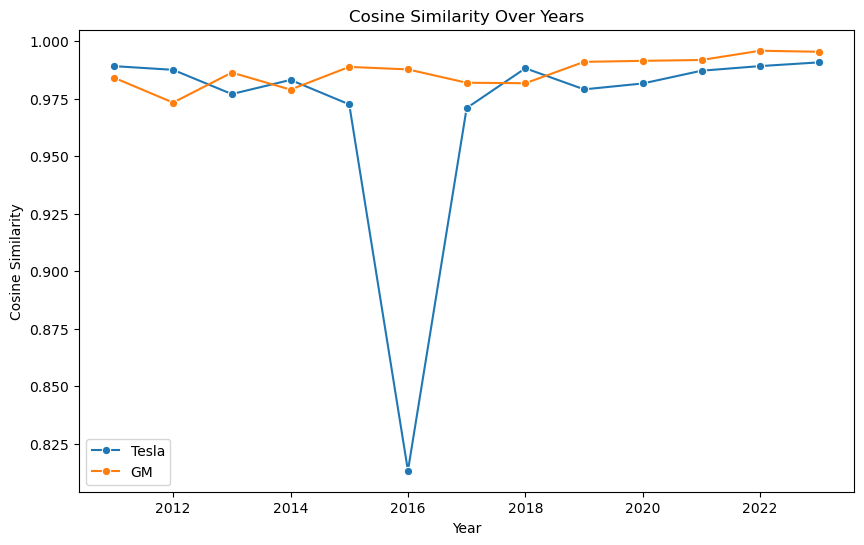

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Year', y='Tesla Cosine Similarity', marker='o', label='Tesla')
sns.lineplot(data=results_df, x='Year', y='GM Cosine Similarity', marker='o', label='GM')
plt.title('Cosine Similarity Over Years')
plt.ylabel('Cosine Similarity')
plt.xlabel('Year')
plt.legend()
plt.show()

C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

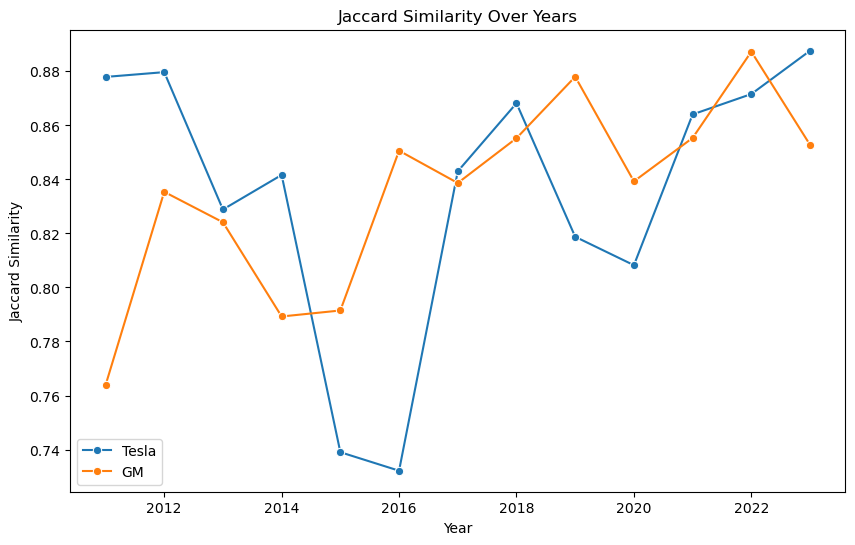

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='Year', y='Tesla Jaccard Similarity', marker='o', label='Tesla')
sns.lineplot(data=results_df, x='Year', y='GM Jaccard Similarity', marker='o', label='GM')
plt.title('Jaccard Similarity Over Years')
plt.ylabel('Jaccard Similarity')
plt.xlabel('Year')
plt.legend()
plt.show()

C:\Users\somya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


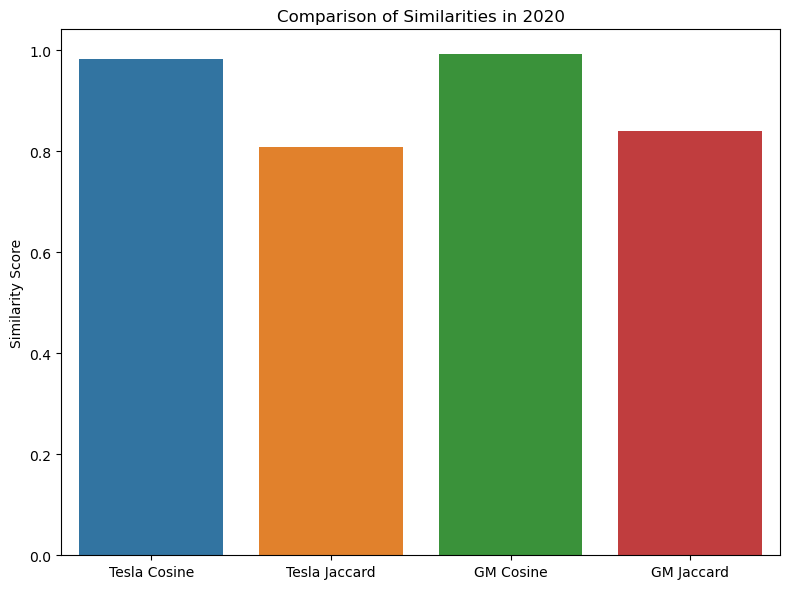

In [18]:
year = 2020  # Example year
year_data = results_df[results_df['Year'] == year]

plt.figure(figsize=(8, 6))
sns.barplot(data=year_data, x=['Tesla Cosine', 'Tesla Jaccard', 'GM Cosine', 'GM Jaccard'], y=[year_data['Tesla Cosine Similarity'].values[0], year_data['Tesla Jaccard Similarity'].values[0], year_data['GM Cosine Similarity'].values[0], year_data['GM Jaccard Similarity'].values[0]])
plt.title(f'Comparison of Similarities in {year}')
plt.ylabel('Similarity Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Sentiment Analysis on Mdna- Somya Jindal

In [1]:
import pandas as pd
import requests
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
df=pd.read_csv('combined_data_10k.csv', index_col=0)
#df.head()

In [2]:
def preprocess_10k(report_text):
    tokens = word_tokenize(report_text)
    tokens = [token.lower() for token in tokens]
    words = [word for word in tokens if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    preprocessed_text = ' '.join(words)
    return preprocessed_text
df['mdna_preprocessed_text'] = df['mdna'].apply(preprocess_10k)

!pip install vadersentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
scores = [analyzer.polarity_scores(sentence) for sentence in df['mdna_preprocessed_text']]
neg_s = [i["neg"] for i in scores]
neu_s = [i["neu"] for i in scores]
pos_s = [i["pos"] for i in scores]
compound_s = [i["compound"] for i in scores]
df['negscore_Vader'], df['neuscore_Vader'], df['posscore_Vader'], df['compound_Vader'] = neg_s, neu_s, pos_s, compound_s
df[['mdna_preprocessed_text','negscore_Vader','neuscore_Vader','posscore_Vader','compound_Vader']].head(5)

,mdna_preprocessed_text,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,item management discussion analysis financial ...,0.043,0.771,0.185,1.0
1,item management discussion analysis financial ...,0.040,0.772,0.188,1.0
2,item management discussion analysis financial ...,0.041,0.780,0.178,1.0
3,item management discussion analysis financial ...,0.039,0.779,0.182,1.0
4,item management discussion analysis financial ...,0.035,0.787,0.178,1.0


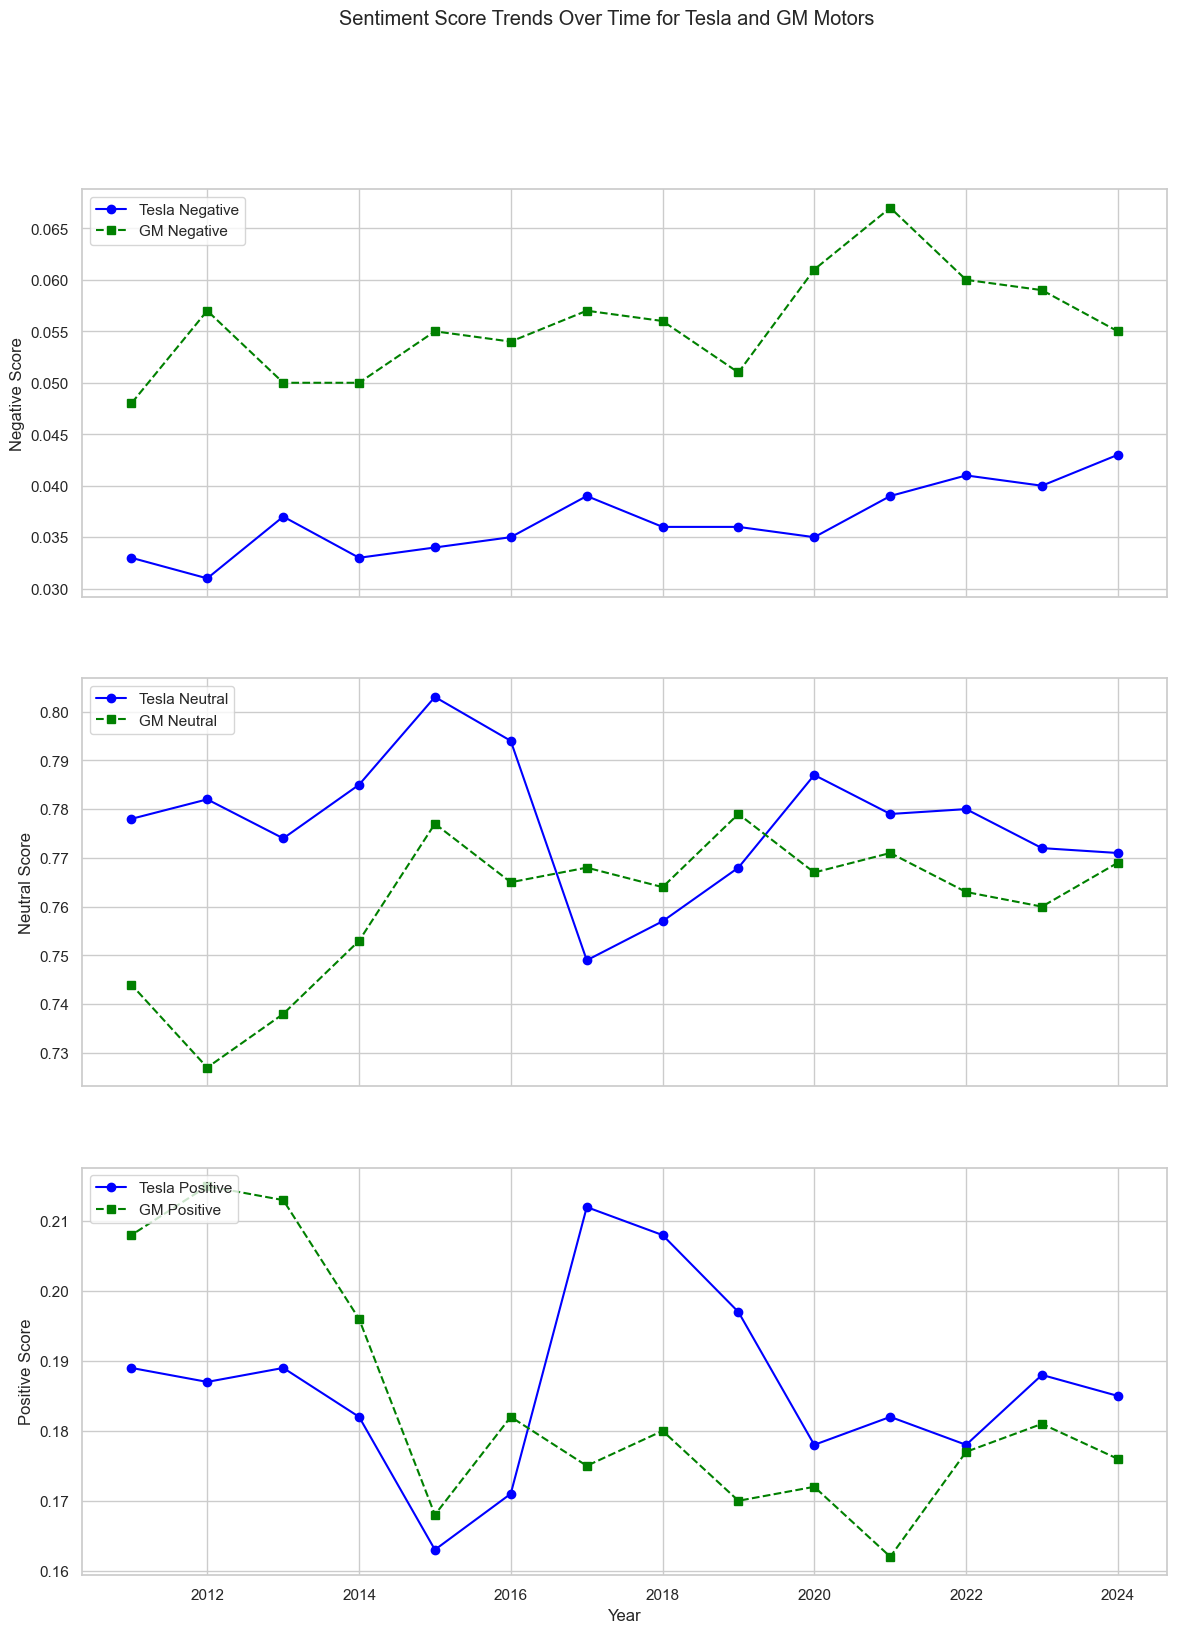

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

df['filing_year'] = pd.to_datetime(df['filing_year'], format='%Y')
sns.set(style="whitegrid")

fig, ax = plt.subplots(3, 1, figsize=(14, 18), sharex=True)

sentiments = ['negscore_Vader', 'neuscore_Vader', 'posscore_Vader']
labels = ['Negative', 'Neutral', 'Positive']

for i, sentiment in enumerate(sentiments):
    # Tesla data
    tesla_data = df[df['ticker'] == 'TSLA']
    ax[i].plot(tesla_data['filing_year'], tesla_data[sentiment], marker='o', linestyle='-', label=f'Tesla {labels[i]}', color='blue' )

    # GM data
    gm_data = df[df['ticker'] == 'GM']
    ax[i].plot(gm_data['filing_year'], gm_data[sentiment], marker='s', linestyle='--',  label=f'GM {labels[i]}', color='green')

    ax[i].set_ylabel(f'{labels[i]} Score')
    ax[i].legend(loc='upper left')

ax[-1].set_xlabel('Year')
fig.suptitle('Sentiment Score Trends Over Time for Tesla and GM Motors')
plt.show()

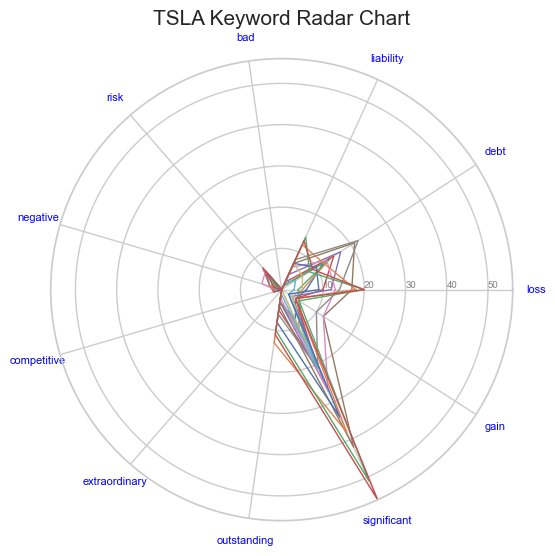

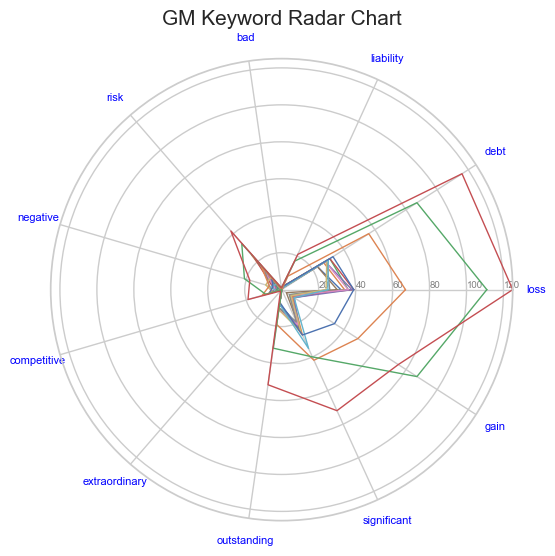

In [5]:
from math import pi

keywords = ['loss', 'debt', 'liability', 'bad', 'risk', 'negative', 
            'competitive', 'extraordinary', 'outstanding', 'significant', 'gain']

for keyword in keywords:
    df[keyword + '_count'] = 0

for keyword in keywords:
    df.loc[:, keyword + '_count'] = df['mdna_preprocessed_text'].apply(lambda text: text.lower().count(keyword))


tickers = df['ticker'].unique()  

def create_radar_chart(df_subset, title):
    # Number of variables we're plotting.
    categories = [keyword + '_count' for keyword in keywords]
    N = len(categories)

    # What will be the angle of each axis in the plot?
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Complete the loop

    # Initialize the spider plot
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], keywords, color='blue', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(color="grey", size=7)
    plt.ylim(0, df_subset[categories].max().max())

    # Plot each filing
    for index, row in df_subset.iterrows():
        values = row[categories].tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=index)


    plt.title(title, size=15)

    plt.show()


for ticker in tickers:
    df_subset = df[df['ticker'] == ticker]
    create_radar_chart(df_subset, f"{ticker} Keyword Radar Chart")

# Frequency of keywords in Business Section (Item 1)- Somya Jindal


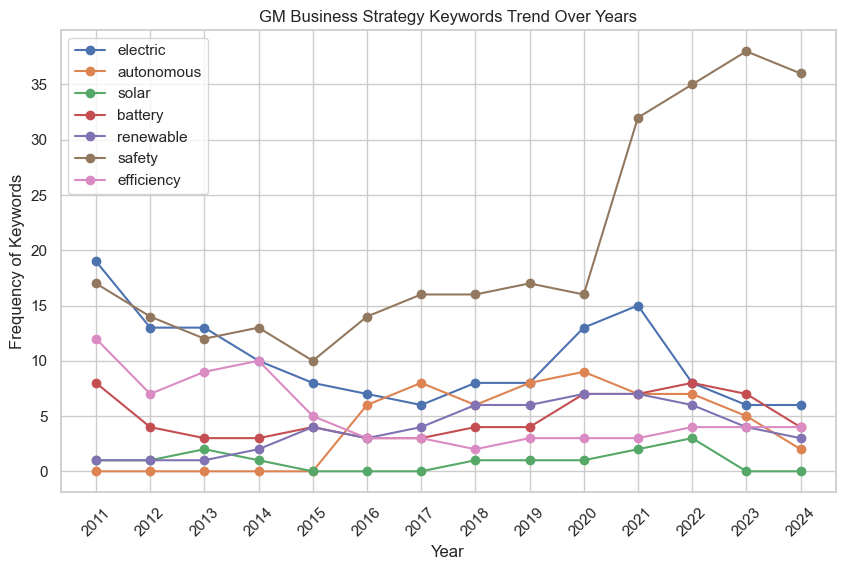

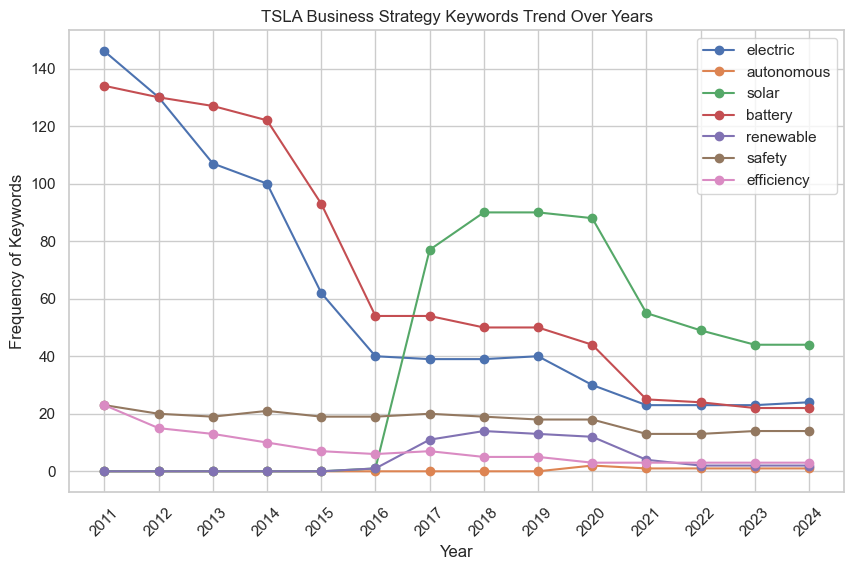

In [6]:
df['business_preprocessed_text'] = df['Business'].apply(preprocess_10k)
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

def preprocess_text(text):
    return ' '.join(text.lower().split())

vectorizer = CountVectorizer(preprocessor=preprocess_text)
x = vectorizer.fit_transform(df['business_preprocessed_text'])
df_vectorized = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)
df = pd.concat([df, df_vectorized], axis=1)

keywords = ['electric', 'autonomous', 'solar', 'battery', 'renewable', 'safety', 'efficiency']

grouped = df.groupby(['ticker', 'filing_year'])[keywords].sum()


for company in grouped.index.get_level_values(0).unique():
    fig, ax = plt.subplots(figsize=(10, 6))
    company_data = grouped.xs(company, level=0)
    # Convert the index to just the year if it is not already
    years = company_data.index.astype(str).str[:4]
    
    for keyword in keywords:
        if keyword in company_data:
            ax.plot(years, company_data[keyword], marker='o', label=f'{keyword}')
    
    ax.set_title(f'{company} Business Strategy Keywords Trend Over Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency of Keywords')
    ax.legend()
    
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45)  # Rotate for better readability if necessary

    plt.show()

# Clustering- Somya Jindal

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd


tfidf_vectorizer = TfidfVectorizer(preprocessor=preprocess_text)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['business_preprocessed_text'])

# Perform KMeans clustering
# Since we want to cluster into 2 groups (Tesla and GM), n_clusters is set to 2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tfidf_matrix)

# The labels_ attribute gives the cluster assignment for each document
clusters = kmeans.labels_

# Now add the cluster assignments to the original DataFrame
df['cluster'] = clusters

# Assuming you know which index corresponds to which company, you can compare
# Alternatively, you can examine the cluster centers and see which keywords are most prominent in each cluster
print(kmeans.cluster_centers_)

# Now let's see if the clusters correspond to Tesla and GM, which we can check by examining the distribution
# of company labels within each cluster
for cluster_num in range(2):
    print(f"Cluster {cluster_num}:")
    print(df[df['cluster'] == cluster_num]['ticker'].value_counts())

C:\Users\somya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.         0.00736355 0.         ... 0.         0.00151272 0.00038136]
 [0.0027444  0.         0.00094172 ... 0.00048605 0.         0.        ]]
Cluster 0:
ticker
TSLA    14
Name: count, dtype: int64
Cluster 1:
ticker
GM    14
Name: count, dtype: int64


In [8]:
# Get the feature names
terms = tfidf_vectorizer.get_feature_names_out()

# Get the centroids
centroids = kmeans.cluster_centers_

for i in range(2):
    # Get the centroid for cluster i
    centroid = centroids[i]
    # Get the indices of the top 10 features for this centroid
    top_indices = centroid.argsort()[-10:][::-1]
    # Get the corresponding terms
    top_terms = [terms[ind] for ind in top_indices]
    print(f"Cluster {i} top terms: {top_terms}")

Cluster 0 top terms: ['vehicles', 'energy', 'vehicle', 'tesla', 'solar', 'model', 'battery', 'electric', 'storage', 'systems']
Cluster 1 top terms: ['gm', 'vehicle', 'vehicles', 'president', 'sales', 'vice', 'standards', 'requirements', 'emission', 'financial']


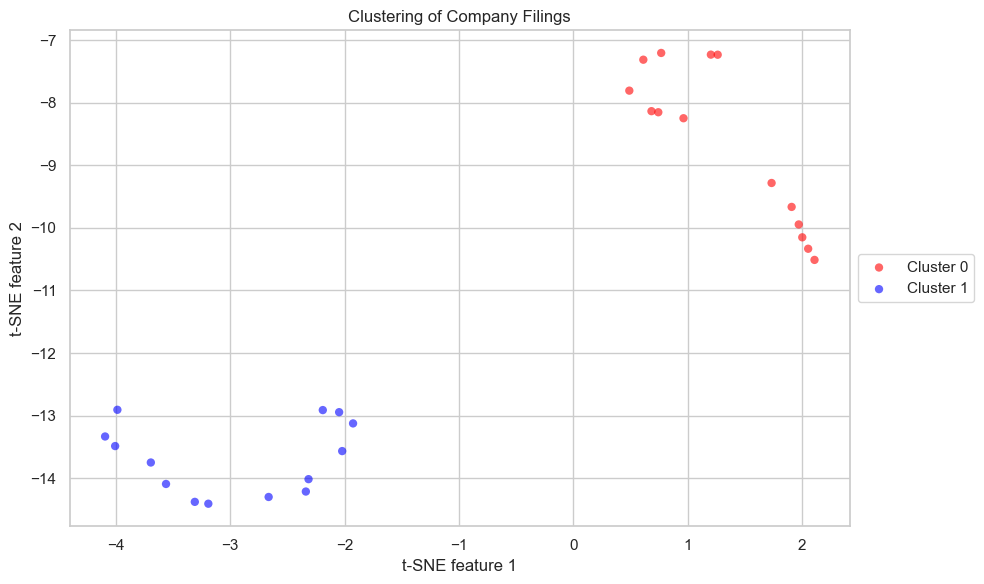

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get the number of samples
n_samples = tfidf_matrix.shape[0]

# Choose a perplexity value smaller than the number of samples
# A common practice is to have a perplexity of less than 10% of the number of samples

perplexity_value = n_samples * 0.1 if n_samples > 50 else n_samples / 2 - 1
tsne = TSNE(n_components=2, perplexity=perplexity_value, init='random', random_state=42)
X_tsne = tsne.fit_transform(tfidf_matrix.toarray())  # Convert sparse matrix to dense

plt.figure(figsize=(10, 6))
colors = ['red', 'blue']

# Scatter plot for each cluster
for idx, color in enumerate(colors):
    # Select data points that belong to the current cluster
    points = X_tsne[clusters == idx]
    plt.scatter(points[:, 0], points[:, 1], c=color, label=f'Cluster {idx}', alpha=0.6, edgecolors='none')

plt.title('Clustering of Company Filings')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.tight_layout()  
plt.show()

In [10]:
# Get the feature names from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Number of top terms you want to see for each cluster
top_n_terms = 10

for i, centroid in enumerate(centroids):
    # Sort the centroid coordinates (mean TF-IDF values) in descending order
    # Take the indices of the top_n_terms highest values
    top_indices = centroid.argsort()[-top_n_terms:][::-1]

    # Map the indices to the corresponding terms
    top_terms = [feature_names[idx] for idx in top_indices]

    print(f"Cluster {i} top terms: {top_terms}")

Cluster 0 top terms: ['vehicles', 'energy', 'vehicle', 'tesla', 'solar', 'model', 'battery', 'electric', 'storage', 'systems']
Cluster 1 top terms: ['gm', 'vehicle', 'vehicles', 'president', 'sales', 'vice', 'standards', 'requirements', 'emission', 'financial']
